In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler,OneSidedSelection 
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import GradientBoostingRegressor,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")

In [2]:
x=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']
xtrain,x_test,ytrain,y_test = train_test_split(x,y, stratify = y,shuffle = True,random_state = 0)


In [3]:

Extra_Tree_classifier = ExtraTreesClassifier(class_weight = 'balanced',max_depth = 10)
Extra_Tree_classifier.fit(xtrain,ytrain)

ExtraTreesClassifier(class_weight='balanced', max_depth=10)

In [4]:
y_pred = Extra_Tree_classifier.predict(x_test)

In [5]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41846 15601]
 [ 1181  4792]]
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     57447
         1.0       0.23      0.80      0.36      5973

    accuracy                           0.74     63420
   macro avg       0.60      0.77      0.60     63420
weighted avg       0.90      0.74      0.79     63420



In [6]:
#over sampling adasyn

In [7]:
adasyn = ADASYN()
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state=0,shuffle = True,stratify = y)
x_train, y_train = adasyn.fit_resample(xtrain, ytrain)

In [8]:
Extra_Tree_classifier = ExtraTreesClassifier(class_weight = 'balanced',max_depth = 10,random_state = 0)
Extra_Tree_classifier.fit(x_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41846 15601]
 [ 1181  4792]]
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     57447
         1.0       0.23      0.80      0.36      5973

    accuracy                           0.74     63420
   macro avg       0.60      0.77      0.60     63420
weighted avg       0.90      0.74      0.79     63420



In [10]:
#over sampling smote

In [11]:
sm = SMOTE(random_state=42)
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state=0,stratify =y,shuffle = True)
x_train, y_train = sm.fit_resample(xtrain, ytrain)

In [12]:
Extra_Tree_classifier = ExtraTreesClassifier(class_weight = 'balanced',max_depth = 10,random_state = 0)

Extra_Tree_classifier.fit(x_train,y_train)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[41846 15601]
 [ 1181  4792]]
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     57447
         1.0       0.23      0.80      0.36      5973

    accuracy                           0.74     63420
   macro avg       0.60      0.77      0.60     63420
weighted avg       0.90      0.74      0.79     63420



In [13]:
x.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [14]:
Extra_Tree_classifier.feature_importances_

array([0.22121298, 0.16534677, 0.00320179, 0.00036978, 0.06555777,
       0.04042985, 0.04120506, 0.01287221, 0.01045854, 0.01048602,
       0.00552164, 0.00176696, 0.00261948, 0.09688416, 0.00112396,
       0.02396361, 0.09397931, 0.0873235 , 0.10027397, 0.0035705 ,
       0.01183215])

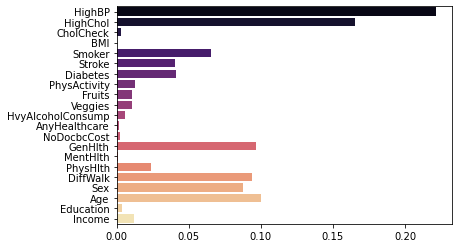

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 
danex = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
daney = Extra_Tree_classifier.feature_importances_
sns.barplot(x = daney,y=danex, palette = 'magma')

plt.savefig('../Plots/ExtraTreeFeature.png')